# Recurrent Neural Networks

CSC/DSC 340 Week 12 Slides

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: November 4, 2023

Last Modified: November 5, 2023

## Previously

* We have been using regular neural networks to perform interpolation

![nn](https://preview.redd.it/pjj39fhl1pc61.png?width=640&format=png&auto=webp&s=37fd1d99b4bf9aa2ff64975ba64daa52a3a141f4)

2023-11-08 09:00:20.750123: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 0s 959us/step
0.0001956410941353227


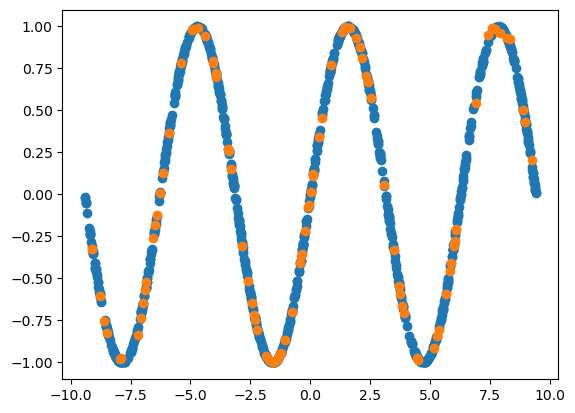

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator


# Generate training data
x_train = np.random.uniform(-3*np.pi, 3*np.pi, 1000)  # Generate 1000 random numbers between -1 and 1
y_train = np.sin(x_train)  # Get corresponding function values

# Create the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=500, verbose=0)

# Test the model
x_test = np.random.uniform(-3*np.pi, 3*np.pi, 100)
y_test = np.sin(x_test)
y_pred = model.predict(x_test)

print(mse(y_test, y_pred))


plt.scatter(x_train, y_train)
plt.scatter(x_test, y_pred)

* While regular neural networks perform well at interpolation, they tend to perform poorly when asked to extrapolate (this is a fact that is true of most machine learning algorithms)

7/7 [==============================] - 0s 661us/step
0.5950051367931846


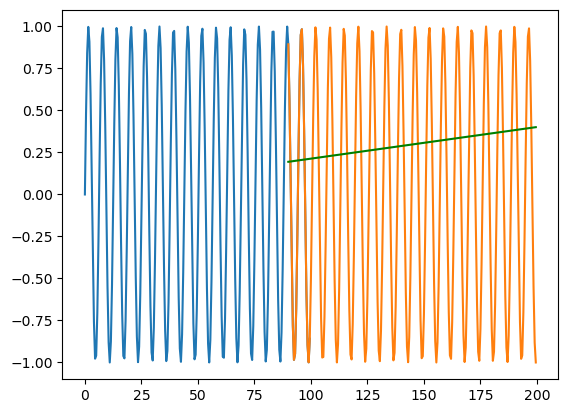

In [8]:
X_train = np.arange(0,100,0.5) 
y_train = np.sin(X_train)

X_test = np.arange(90,200,0.5) 
y_test = np.sin(X_test)

# Create the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=500, verbose=0)

y_pred = model.predict(X_test)

print(mse(y_test, y_pred))

plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.plot(X_test, y_pred, color='green')

* Many extrapolation cases with machine learning use _recurrent neural networks_
* While traditional neural networks are _feedforward_ (data only passes from input layer to output layer) recurrent neural networks have a memory that feeds information backwards

![rnn](https://1394217531-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LvBP1svpACTB1R1x_U4%2F-LwEQnQw8wHRB6_2zYtG%2F-LwEZT8zd07mLDuaQZwy%2Fimage.png?alt=media&token=93a3c3e2-e32b-4fec-baf5-5e6b092920c4)

* Note that the input data for an RNN for both training and testing needs to be three dimensional.

* `SimpleRNN` has the same arguments as `Dense` where the number is the number of neurons and we can set the activation function.

* Note that you still need at least one `Dense` layer at the end of the network to "post-process" the results

7/7 [==============================] - 0s 1ms/step
0.5094798309773101


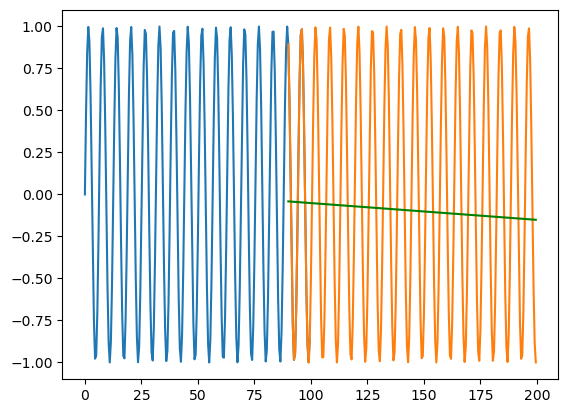

In [9]:
X_train = np.arange(0,100,0.5) 
y_train = np.sin(X_train)

X_test = np.arange(90,200,0.5) 
y_test = np.sin(X_test)

# Preprocess the data for the RNN
X_train = X_train.reshape(-1, 1, 1)  # Reshape the input data for RNN

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, activation='relu', input_shape=(1, 1)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

X_test = X_test.reshape(-1, 1, 1)
y_pred = model.predict(X_test)

print(mse(y_test.flatten(), y_pred))


plt.plot(X_train.flatten(), y_train)
plt.plot(X_test.flatten(), y_test)
plt.plot(X_test.flatten(), y_pred, color='green')

* This network did not perform well at extrapolation, so let's try some hyperparameter tuning
    * Try adding more `SimpleRNN` layers which will result in more recurrent neurons (more memory)

7/7 [==============================] - 0s 844us/step
0.5112687306938891


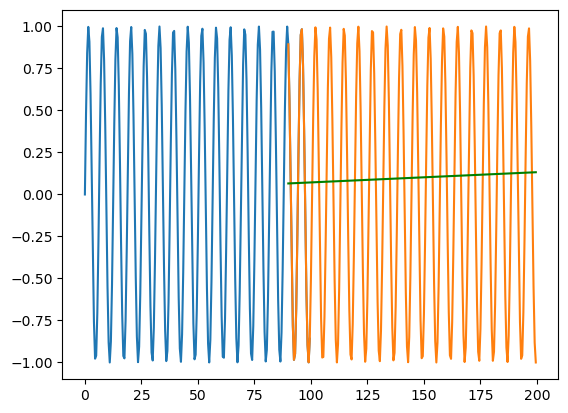

In [10]:
X_train = np.arange(0,100,0.5) 
y_train = np.sin(X_train)

X_test = np.arange(90,200,0.5) 
y_test = np.sin(X_test)

# Preprocess the data for the RNN
X_train = X_train.reshape(-1, 1, 1)  # Reshape the input data for RNN

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(1, 1)),
    tf.keras.layers.SimpleRNN(32, activation='relu',return_sequences=True),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

X_test = X_test.reshape(-1, 1, 1)
y_pred = model.predict(X_test)

print(mse(y_test, y_pred.flatten()))


plt.plot(X_train.flatten(), y_train)
plt.plot(X_test.flatten(), y_test)
plt.plot(X_test.flatten(), y_pred.flatten(), color='green')

* Some applications of RNNs have shown that in addition to using `Dense` layers to post-process the results of RNN layers, `Dense` layers can also be used to pre-process the results before they reach the RNN layers

7/7 [==============================] - 0s 988us/step
0.6448849821374143


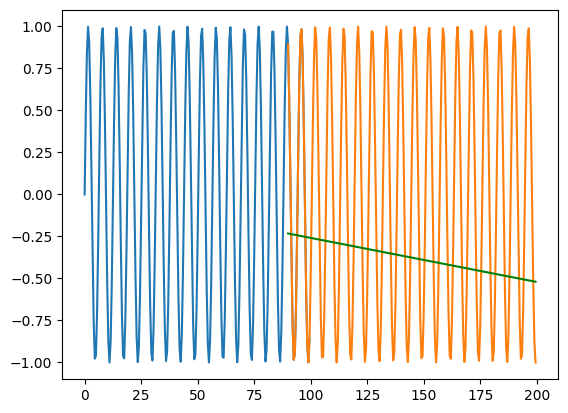

In [5]:
X_train = np.arange(0,100,0.5) 
y_train = np.sin(X_train)

X_test = np.arange(90,200,0.5) 
y_test = np.sin(X_test)

# Preprocess the data for the RNN
X_train = X_train.reshape(-1, 1, 1)  # Reshape the input data for RNN

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1, 1)),
    tf.keras.layers.SimpleRNN(32, activation='relu', return_sequences=True),
    tf.keras.layers.SimpleRNN(32, activation='relu',return_sequences=True),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

X_test = X_test.reshape(-1, 1, 1)
y_pred = model.predict(X_test)

print(mse(y_test, y_pred.flatten()))


plt.plot(X_train.flatten(), y_train)
plt.plot(X_test.flatten(), y_test)
plt.plot(X_test.flatten(), y_pred.flatten(), color='green')

* `SimpleRNN` layers are not working too well at this task, so let's attempt to try another type of RNN layer
* `LSTM` (long short term memory) layers are improved RNN layers
* It maintains long-term dependencies in the data by replacing a simple neuron with a _memory cell_ that can store information over time
* The memory is maintained through a series of logic gates
* Well suited for applications with ordered data such as natural language processing

7/7 [==============================] - 0s 770us/step
0.5191158924236982


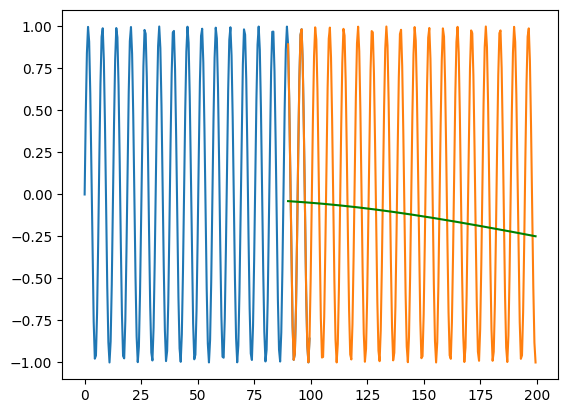

In [6]:
X_train = np.arange(0,100,0.5) 
y_train = np.sin(X_train)

X_test = np.arange(90,200,0.5) 
y_test = np.sin(X_test)

# Preprocess the data for the RNN
X_train = X_train.reshape(-1, 1, 1)  # Reshape the input data for RNN

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, input_shape=(1, 1)),
    tf.keras.layers.LSTM(32, activation='relu',return_sequences=True),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

X_test = X_test.reshape(-1, 1, 1)
y_pred = model.predict(X_test)

print(mse(y_test, y_pred.flatten()))


plt.plot(X_train.flatten(), y_train)
plt.plot(X_test.flatten(), y_test)
plt.plot(X_test.flatten(), y_pred.flatten(), color='green')

* Another, improved RNN layer is called a GRU (gated recurrent unit)
* Perform similarly to LSTM layers and are used in many of the same applications, but are less prone to the vanishing gradient problem

7/7 [==============================] - 0s 985us/step
0.5029416475233864


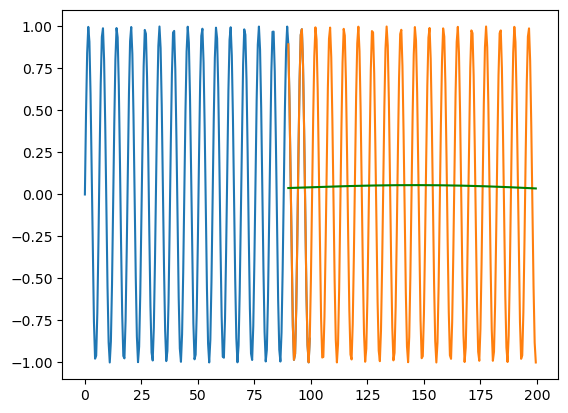

In [5]:
X_train = np.arange(0,100,0.5) 
y_train = np.sin(X_train)

X_test = np.arange(90,200,0.5) 
y_test = np.sin(X_test)

# Preprocess the data for the RNN
X_train = X_train.reshape(-1, 1, 1)  # Reshape the input data for RNN

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=(1, 1)),
    tf.keras.layers.GRU(32, activation='relu',return_sequences=True),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

X_test = X_test.reshape(-1, 1, 1)
y_pred = model.predict(X_test)

print(mse(y_test, y_pred.flatten()))


plt.plot(X_train.flatten(), y_train)
plt.plot(X_test.flatten(), y_test)
plt.plot(X_test.flatten(), y_pred.flatten(), color='green')

* All these RNN networks are performing poorly on what should be an easy to recognize long term pattern
* Perhaps the problem is not the RNNs but on how we are trying to train them.

Traditional Training: $f(x_i) = y_i$

Time Series Training: $f(y_{i-3}, y_{i-2}, y_{i-1}) = y_i$

* Limitation: the data must be evenly spaced by some sort of input variable (this is now a hidden variable)

* Let's try reformatting our data as a time series and training a very simple RNN

In [6]:
n_features = 1

train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))

seq  = 20

train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = seq, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = seq, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

Taking 20 datapoints, then predicting the 21st point

2023-11-08 09:08:53.122646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-08 09:08:53.123392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-08 09:08:53.124406: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

20/20 [==============================] - 0s 1ms/step
4.076604566890977e-06


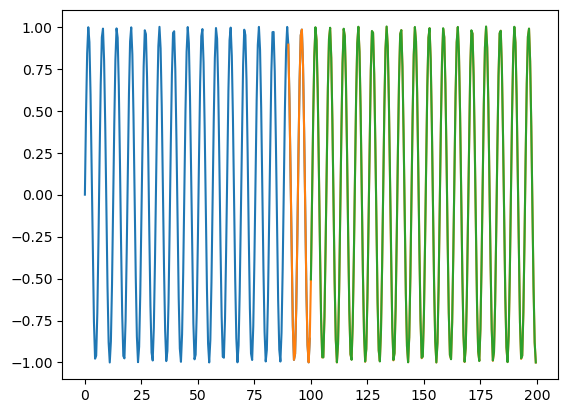

In [7]:
n_neurons  = 4
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(n_neurons, input_shape=(seq, n_features)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(train_generator,epochs=300, verbose=0)

y_pred  = model.predict(test_generator)

print(mse(y_test[20:], y_pred.flatten()))

plt.plot(X_train.flatten(),y_train)
plt.plot(X_test.flatten(),y_test)
plt.plot(X_test[20:].flatten(),y_pred)


* Even with an exceedingly small and simple RNN, it was able to capture the patterns in the data using the time series data formatting. 
* This is how all RNNs are taught sequential data, even text/natural language processing (more on this next week!)